<a href="https://colab.research.google.com/github/somyaranjan26/DeepLearning/blob/master/ExplainableAI_Lime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import regularizers


In [ ]:
pip install lime

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=a987b4828e969781b0da7216abd0159fbc621338692075bf3bc50eff0616fd70
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/lung disease classification /VGG19_CovidAndPneumonia.h5')

In [ ]:
model.summary()

In [ ]:
model.load_weights('/content/drive/My Drive/lung disease classification /vggweights_CoviAndPneumonia.hdf5')

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
     '/content/drive/My Drive/lung disease classification /Dataset/test',
     target_size=(224,224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)

Found 120 images belonging to 2 classes.


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [ ]:
from sklearn import metrics

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

    Covid-19       0.97      0.57      0.72        60
   Pneumonia       0.69      0.98      0.81        60

    accuracy                           0.78       120
   macro avg       0.83      0.77      0.76       120
weighted avg       0.83      0.78      0.76       120



In [ ]:
import pandas as pd
from keras.utils.np_utils import to_categorical 
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
test_labels = test_data_generator.classes  
test_labels = to_categorical(test_labels, num_classes=3)

In [ ]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(predictions).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
   else:
     print("Confusion matrix, without normalization")
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

Normalized confusion matrix


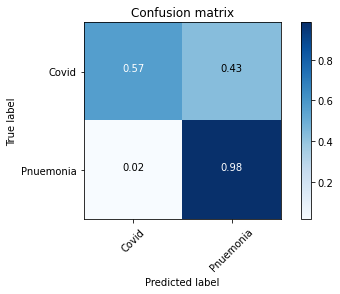

In [ ]:
plot_confusion_matrix(confusion_matrix,['Covid','Pnuemonia'],normalize=True)

In [ ]:
from keras.preprocessing import image
import numpy as np # linear algebra
import pandas as pd 
import os
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import glob
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [ ]:
DATADIR = "/content/drive/My Drive/lung disease classification /Dataset/test"
CATEGORIES = ['Covid-19','Pneumonia'] 
IMG_SIZE = 224
X,Y = [],[]
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  class_num = CATEGORIES.index(category)
  i=0
  for img in os.listdir(path):
    image_path = os.path.join(path,img) 
    img = image.load_img(image_path, target_size=(224, 224,3))
    img_data = image.img_to_array(img)
    img_data = preprocess_input(img_data)
    X.append(img_data)
    Y.append(class_num)
    i+=1
    if i>5:
      break


In [ ]:
X = np.array(X)
y = np.array(Y)

In [ ]:
X[0].shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


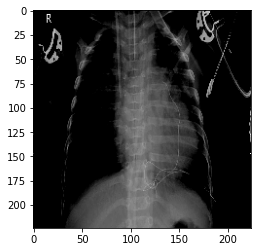

In [ ]:
plt.imshow(X[9], cmap= 'gray')
plt.show()

In [ ]:
y_pred_train = model.predict(X)
bad_predictions = (y_pred_train.argmax(axis=1) != y)
print('Bad predictions:', sum(bad_predictions))

Bad predictions: 0


In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



CPU times: user 1h 42min 54s, sys: 20.5 s, total: 1h 43min 15s
Wall time: 53min 15s


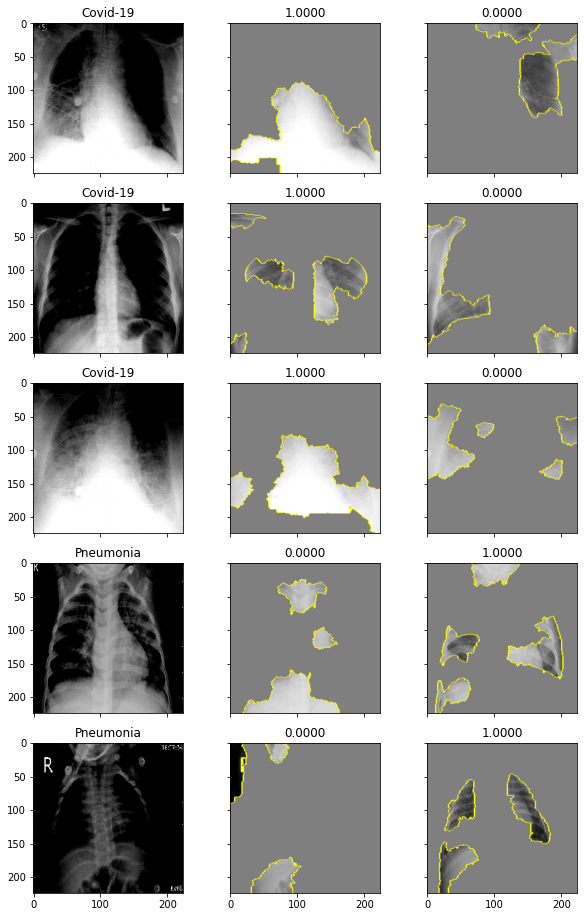

In [ ]:
%%time
fig, ax = plt.subplots(5, 3, sharex='col', sharey='row')
fig.set_figwidth(10)
fig.set_figheight(16)
indecies = random.sample(range(X.shape[0]), 5)
for j in range(5):
    explanation = explainer.explain_instance(X[indecies[j]], model.predict, 
                                             top_labels=5, hide_color=0, num_samples=1000, 
                                             random_seed=42)
    ax[j,0].imshow(X[indecies[j]])
    ax[j,0].set_title(CATEGORIES[y[indecies[j]]])
    for i in range(2):
        temp, mask = explanation.get_image_and_mask(i, positive_only=True, 
                                                    num_features=5, hide_rest=True)
        ax[j,i+1].imshow(mark_boundaries(temp / 2 + 0.5, mask))
        ax[j,i+1].set_title('{:.4f}'.format( y_pred_train[indecies[j]][i]))
plt.savefig('explainable_AI.pdf')

In [ ]:
plt.savefig('explainableAI.pdf')

<Figure size 432x288 with 0 Axes>